# Prepare and Analyze Time Series - Milestone 2

This Jupyter notebook serves as a guided workflow to Milestone 2 of the liveProject on End-to-end Time Series Forecasting with Deep Learning.

You can upload this notebook to Colab and work from there. Alternatively, you can also work on this notebook in your local environment.

Once again, great job on completing previous Milestone! We have preliminarily processed and cleaned the data so we can now proceed with our exploratory data analysis. Based on the results of our analysis, we may either proceed to modeling or further perform some data processing and cleaning as shown in the diagram below.

![Milestone 2](https://s3.ap-southeast-1.amazonaws.com/www.jiahao.io/manning/project1_milestone2.png)

Specifically in Milestone 2, we shall complete 3 tasks:
1. Analyze and visualize retail sales by weekday, month and year
2. Determine seasonality
3. Train-test split data for model ingestion

Without further ado, let's begin!

## Importing Necessary Libraries and Functions

Let us first import the necessary libraries and load the data that we will be working with throughout this Milestone. 

The data (data/sales_processed.csv) that we are using is an output from previous Milestone. 

Again, recall that in this liveProject, you are a data scientist at a large retailer and your challenge is to forecast the sales of the respective stores by each category for the next 28 days.

<ins>Instructions</ins>:<br>
- We have written the code to import the libraries so you can just run it as-is. If you need other libraries while working on this notebook, please feel free to add the library to this cell below.

In [10]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
if RunningInCOLAB:
  !pip install plotly==5.2.1  # Do restart runtime when prompted if you are running this in Colab
import plotly.express as px
from scipy import signal
from scipy.signal import savgol_filter

np.seterr(divide='ignore')

%matplotlib inline

# suppress pandas SettingWithCopyWarning 
pd.options.mode.chained_assignment = None

## Initial Data Exploration

<ins>Instructions</ins>:<br>
- Read in the data *sales_processed.csv* from the data folder into a pandas dataframe and preview the first 5 rows. Set the `date` column to datetime format.

<ins>Hints</ins> (click when needed):<br>
- [Follow the example code here to upload files to Colab from your local file system](https://colab.research.google.com/notebooks/io.ipynb)
- [Use Pandas `read_csv` function to load CSV data](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
# upload file from Colab


In [ ]:
# read in our processed data
# by using parse_dates in parameter of read_csv, we can convert date column to datetime format without additional step


As a start, let's try to visualize our time series data. Remember we have multiple time series with each series being sales by store and category. So we need to plot each of these series as separate lines. Rather than plotting individual line charts, let's plot them all on same plot so that we can also compare across series.

<ins>Instructions</ins>:<br>
- Plot line charts of each time series in the same diagram.

<ins>Hints</ins> (click when needed):<br>
- [Use Pandas `plot` method to plot line charts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [Use Pandas `groupby` to plot by groups](https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot)

In [ ]:
# plot line chart by group


Oops! Ok that did not work well... Let's reduce the number of series in a plot by filtering by category and plot an interactive plot for easy toggling. Below, we plotted a Plotly diagram where one can click on the variable in the legend to toggle the time series on or off. We can also zoom into a section of the plot by click dragging a box around that particular section.

<ins>Instructions</ins>:<br>
- Plot line charts of the same category in a plotly diagram
- Play around with the diagrams and analyse the time series

<ins>Hints</ins> (click when needed):<br>
- [Refer to Plotly example on "Configuring Tick Labels" to plot your own Plotly line charts](https://plotly.com/python/time-series/#configuring-tick-labels)
- [In order to fit Plotly's example, use Pandas `pivot_table` function to reshape your dataframe](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [ ]:
# function to show plotly plot
def show_sales(df, category):
    """
    Plot interactive line charts of sales
    """
    

# plot for FOODS category


In [ ]:
# plot for HOBBIES category


In [ ]:
# plot for HOUSEHOLD category


From our Plotly diagrams, we can see that there are some time series which have abrupt breaks in trend. These breaks will not be helpful for our modeling later so we should remove the past data before the breaks.

![Trend Break](https://s3.ap-southeast-1.amazonaws.com/www.jiahao.io/manning/trend_break.PNG)

<ins>Instructions</ins>:<br>
- Identify the time series with breaks in trend 
- Remove the past data before the breaks from these time series (e.g., we identified data points for series_id=='WI_1_FOODS' and < '2012-11-01' should be dropped due to trend break)
- Save the output as `sales_cleaned.csv` in the data folder

<ins>Hints</ins> (click when needed):<br>
- [Use Pandas `to_csv` method to save your output as CSV file](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
# drop the data points identified as past data before trend breaks


In [ ]:
# save output to sales_cleaned.csv


Now that we have our sales data cleaned up, we can analyse the sales data again in detail. Specifically, we are going to analyze and visualize the retail sales by weekday, month and year, or in other words, find out the trend and seasonality patterns.

<ins>Instructions</ins>:<br>
- Choose a random `store_id` and `cat_id` to analyse the time series
- Plot the box plots of the sales by weekday, day of month, and month separately
- Plot line charts of sales by weekday, day of month, and month separately by year

<ins>Note</ins>: Use the diagrams below as a reference for your plots.

![Seasonality plots](https://s3.ap-southeast-1.amazonaws.com/www.jiahao.io/manning/seasonality_pattern_plots.PNG)

<ins>Hints</ins> (click when needed):<br>
- [Use Seaborn `boxplot` to generate box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [Use Seaborn `lineplot` to plot line plots](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [ ]:
# filter for a time series


In [ ]:
# box plots by weekday, day of month, and month


In [ ]:
# line charts by weekday, day of month, and month, group by year


From our plots, we can clearly see a strong weekday pattern and some monthly seasonality: 
- Sales tend to be higher on Friday and weekends
- Mid of the month spike in sales followed by a trend downwards for rest of month
- No obvious yearly seasonality

Besides using plots, is there a more objective way of determining seasonality? This is what we will investigate in the next section below.

## Determine Seasonality

Let's now have a more objective way of determining seasonality. We can do this via a periodogram.

You can read up more about what is a periodogram over [here](https://online.stat.psu.edu/stat510/lesson/6/6.1#paragraph--356). But in a nutshell, a time series can be viewed as a composition of repeating waves of various amplitude and frequency, and the peridogram shows the possible frequency values that are important in describing the oscillating pattern of the time series. Thus, if there is a seasonality pattern that repeats itself, the periodogram will be able to capture that.

As an example, we show below a time series exhibiting periodicity every 3 time intervals. 

<AxesSubplot:>

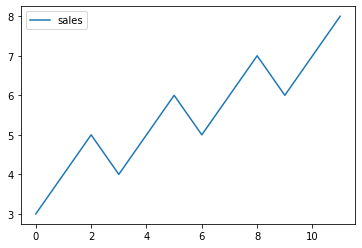

In [16]:
df = pd.DataFrame({'sales': [3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7, 8]})
df.plot()

To determine the periodicity, we first detrend the time series before setting up the periodogram so as to give more accurate results as mentioned by [this online university resource notes](https://online.stat.psu.edu/stat510/lesson/6/6.1#paragraph--360).
> """

> It’s generally best to detrend the data either using differences or some sort of trend line before determining the periodogram

> """

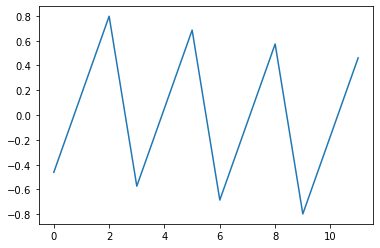

In [20]:
# scipy detrend is used to detrend sales
data_detrended = signal.detrend(df['sales'].values)

_ = plt.plot(data_detrended)

We then set up a periodogram using [Scipy's periodogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html) and plot the periodogram to identify the main seasonality pattern(s).

Notice the peak in the Periodogram below at around frequency 0.33.

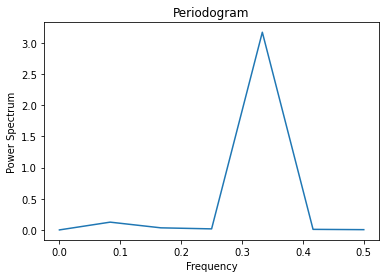

In [21]:
f, Periodogram = signal.periodogram(data_detrended)
plt.plot(f, Periodogram)
plt.title("Periodogram")
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()


As frequency values are not very reader-friendly, we can invert the frequency values from periodogram (i.e., 1/freq) to get the time interval values.

So in the dataframe below, after inverting the frequencies, we see that the peak frequency corresponds to a time interval of 3, which is what we have purposedly set the data to be.

In [22]:
# Make dataframe for finding frequency with highest power spectrum
data = {'interval':1/f, 'power_spectral_density':Periodogram}
df_periodogram = pd.DataFrame(data = data)
df_periodogram.sort_values(by=['power_spectral_density'], ascending=False, inplace=True)
df_periodogram

,interval,power_spectral_density
4,3.0,3.168859
1,12.0,0.124590
2,6.0,0.033384
3,4.0,0.016692
5,2.4,0.008945
6,2.0,0.004173
0,inf,0.000000


Hope this example helps you to understand how to set up a periodogram.

Without further ado, let's plot the periodogram for our data.

<ins>Instructions</ins>:<br>
- Select a random time series for the periodogram setup.
- Detrend the time series before setting up the periodogram so as to give more accurate results as mentioned by [this online university resource notes](https://online.stat.psu.edu/stat510/lesson/6/6.1#paragraph--360)
    > """

    > It’s generally best to detrend the data either using differences or some sort of trend line before determining the periodogram
    
    > """
- Set up a periodogram using [Scipy's periodogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html)
-  Plot a periodogram and identify the main seasonality pattern(s)
- Investigate a few other time series and identify the main seasonality pattern(s)

<ins>Hints</ins> (click when needed):<br>
- [Scipy `detrend` can be used to detrend the time series before setting up the periodogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html)
- The frequency values from periodogram can be inverted (i.e., 1/freq) to get the time interval values.

In [ ]:
def detrend_series(store, category):
    """
    Detrend the sales of a time series and return the detrended sales value, 
    the trend identified, and the original sales 
    """

    return

def summarise_periodicity(data_detrended):
    """
    Extract important frequency values with periodogram
    """
    
    return

def plot_periodicity(data_detrended):
    """
    Plot periodogram
    """
    

After sampling a few time series and analysing the periodograms, we can see that there are generally 2-3 significant frequency values. One of them has an especially large power spectral density compared to the other frequency values. We can guess that this is probably the weekly seasonality based on our earlier analysis of the plots.

As frequency values probably do not make sense to us, we can invert them to obtain the time interval values. By filtering the top 3 frequency values for each time series and summarising the counts of the time intervals, we are able to clearly identify the weekly (time interval 7) and monthly seasonalities (time interval 30). We can ignore the rest of the time intervals that are not as frequently occurring. Interestingly, time interval 3 is frequently occurring and we can perhaps interpret it as half-weekly seasonality.

Having analyzed our time series, we are now ready to proceed to our last step before moving on to modeling in the next Milestone.

## Train-Test Split

In order to measure the performance of our models on unseen data, train-test split is a very important technique to implement before modeling. We can use [cross validation](https://otexts.com/fpp3/tscv.html), a more sophisticated form of train-test split, to evaluate our models more accurately.

For time series, we will also need to take in consideration the temporal interdependence.

In our case, we will be implementing a nested walk-forward validation.

![Nested Walk-Forward Validation](https://s3.ap-southeast-1.amazonaws.com/www.jiahao.io/manning/walk_forward_validation.png)

For our hyperparameter tuning, we will train on the training data and evaluate on the validation data in each split. Based on the average model score across the splits, we choose the optimal hyperparameters.

Example for a walk-forward validation with three splits, the process is as follows:
1. Select a set of hyperparameters
2. Train on 1st-split training data using the selected set of hyperparameters
3. Evaluate on 1st-split validation data
4. Repeat steps 2 and 3 for the 2nd and 3rd splits
5. Average the model score obtained for the three splits
6. Repeat steps 1 to 6 for the next set of hyperparameters till all sets are evaluated
7. Optimal hyperparameters will be the one with best average model score

Then using the optimal hyperparameters, we will train on the combined training and validation data, and evaluate on the test data in each split. The average model score will be our final score for the model.

Let's implement our train-test split now.

<ins>Instructions</ins>:<br>
- Code a function that implements train-test split given a cross-validation split number and returns the split's training, validation and test data. Since we are required to forecast for the next 28 days, we can set 28 days as the period for test and validation data. 

<ins>Hints</ins> (click when needed):<br>
- [Pandas `timedelta` can be used to represent a duration, e.g., 28 days](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)

In [ ]:
def get_cv_split(df, split_num, prediction_length=28, validation=True):
    """
    Implement train-test split given a cv split number and return training, val and test data
    """

    return training_df, validation_df, test_df

We can do some quick checks to see that our train-test function does work as expected:
- No overlap in time period
- 28 days in each test and validation data

In [ ]:
# check train-test split function


With the analysis and train-test split function done, we are now ready to move on to modeling in our next final Milestone. Good job!

Do check your answers against our solution before moving on to the next Milestone.